In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [13]:
data_dict = {}
renames = {
    "jdk" : "JVM",
    "graal": "GVM",
    "regular": "Regular",
    "dispatch-no-trees" : "-DTree",
    "dispatch-no-cache" : "-DCache",
    "pure-meta": "-Hybrid",
    "queens2" : "queens",
    "heavy-overloading" : "Overload",
    "pure-loops": "PureLoop"
}
for file in os.listdir("."):
    if file.endswith(".txt"):
        filename, _ = os.path.splitext(file)
        workload, tiger, dynsem, vm = filename.split('_')
        workload = renames[workload] if workload in renames else workload
        tiger = renames[tiger] if tiger in renames else tiger
#         dynsem = renames[dynsem] if dynsem in renames else dynsem
        vm = renames[vm] if vm in renames else vm
        key = (workload, "{} {}".format(tiger, vm))
        with open(file) as f:
            lines = f.readlines()
            lls = [int(e.strip()) for e in lines[:-1]]
            data_dict[key] = lls

pd.DataFrame(data_dict)

list                                                     \
   Overload GVM Overload JVM PureLoop GVM PureLoop JVM Regular GVM   
0        148575         3875        29057         1780       23723   
1         68669         3401        14703         1210       14459   
2          5227         3303        11670         1034          51   
3          8484         3306         2772         1083        1837   
4           200         3370           54         1022          52   
5           226         3299           53         1013          40   
6          3885         3291          705         1015        1559   
7          3892         3333           49         1016          52   
8           204         3293           52         1062          39   
9           215         3303           44         1016          39   
10         3888         3289           61         1016          55   
11         3938         3304           53         1017          40   
12          205         3289           41         1019          40   
13          199         3308           52         1013          57   
14          214         3286           54         1018          41   
15          201         3286           41         1018          39   
16          218         3290           55         1016          61   
17          200         3294           56         1011          39   
18          201         3292           41         1019          39   
19          218         3288           57         1020          65   
20          201         3298           63         1010          55   
21          221         3293          312         1037         220   
22          201         3300           58         1022          56   
23          213         3323           57         1054          50   
24          240         3347           89         1054          91   
25          217         3355           64         1073          54   
26          261         3319           99         1054          48   
27          207         3318           50         1038         102   
28          251         3307           93         1036          46   
29          205         3311           45         1027          43   
30          268         3302           45         1025         104   

                    permute                                         \
   Regular JVM Overload GVM Overload JVM PureLoop GVM PureLoop JVM   
0         1100       100298         1901        12667         1626   
1          572        59668         1286        17478          985   
2          580        11741         1283        17739          938   
3          531          138         1219        12578          974   
4          563         4293         1213         9037          952   
5          508          133         1213         9233          906   
6          520          134         1212           63          914   
7          512          159         1228           51          917   
8          508          135         1214           76          915   
9          509          162         1217           50          906   
10         516          134         1252           91          917   
11         508          196         1309          156          980   
12         509          163         1292           79         1015   
13         509          229         1243          166          945   
14         515          140         1237           56          964   
15         509          208         1253          171          932   
16         509          209         1225          164          949   
17         509          140         1237          177          934   
18         518          212         1228          193          916   
19         509          219         1228          202          931   
20         510          140         1227          200          930   
21         509          219         1239           56          935   
22         519      

In [17]:
df = pd.DataFrame(data_dict)[10:].reset_index(drop="true")


df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Benchmark','Flavor'])

benchmarks = list({b[0] for b in data_dict.keys()})

for benchmark in benchmarks:
    median_jdk = df[benchmark]['Regular JVM'].median()
    df[benchmark] = median_jdk / df[benchmark]

    
speedups = df.median()

speedups = speedups.reindex(reversed(list(speedups.index.get_level_values(1).unique())), level='Flavor')

# speedups = speedups.swaplevel(i="Benchmark", j="Flavor")
# speedups = speedups.reindex(list(reversed(list(speedups.index.get_level_values(0).unique()))), level='Flavor')

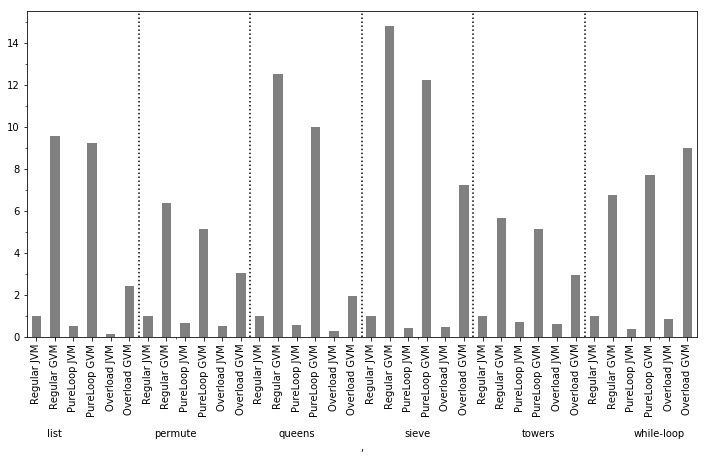

In [72]:
speedups.index.names = ['','']
ax = speedups.plot(kind="bar", figsize=(12, 6), color="Gray")
minor_locator = ticker.AutoMinorLocator(2)

ax.yaxis.set_minor_locator(minor_locator)
ax.set_xticklabels(speedups.index.get_level_values(1))
ax.set_xticklabels(speedups.index.get_level_values(0).unique(), minor=True)
ax.set_xticks(np.arange(1, len(speedups), 6.5), minor=True)

ax.tick_params(axis='x', which='minor', direction='out', pad=90)

ax.patch.set_alpha(0.5)

for x in np.arange(5, 30, 6):
    plt.axvline(x=x+.5, color='k', linestyle=":")

plt.savefig("tiger-relative-speedups.pdf", format='pdf', bbox_inches='tight')
plt.show()

array([ 6, 12, 18, 24])